# The Sparks Foundation - Graduate Rotational Internship Program

## Name : Ausaf Fatima

## Task : Exploratory Data Analysis - Sports

### Description: Perform ‘Exploratory Data Analysis’ on the dataset ‘Indian Premier League’ . As a sports analyst, find out the most successful teams, players and factors contributing to the win or loss of a team. Suggest teams or players a company should endorse for its products.

Importing the initial libraries required.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Setting the style.

In [2]:
sns.set_style('dark')
plt.style.use('seaborn-deep')

Reading the data from the first csv file and taking a look at it.

In [3]:
df1 = pd.read_csv('matches.csv')

In [4]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df1.shape

(756, 18)

In [6]:
df1.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


Sorting the dataframe by date so as to have consistent data.

In [8]:
df1['date'] = pd.to_datetime(df1.date)
import datetime as dt
df1['date'] = df1['date'].apply(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
df1 = df1.sort_values('date')

For this particular analysis, the name delhi daredevils is replaced with delhi capitals to better analyse the performance of delhi over the years.

In [9]:
df1['team1'] = df1['team1'].replace('Delhi Daredevils', 'Delhi Capitals')
df1['team2'] = df1['team2'].replace('Delhi Daredevils', 'Delhi Capitals')
df1['winner'] = df1['winner'].replace('Delhi Daredevils', 'Delhi Capitals')
df1['toss_winner'] = df1['toss_winner'].replace('Delhi Daredevils', 'Delhi Capitals')

Toss Winners.

Text(0.5, 1.0, 'Toss Winners')

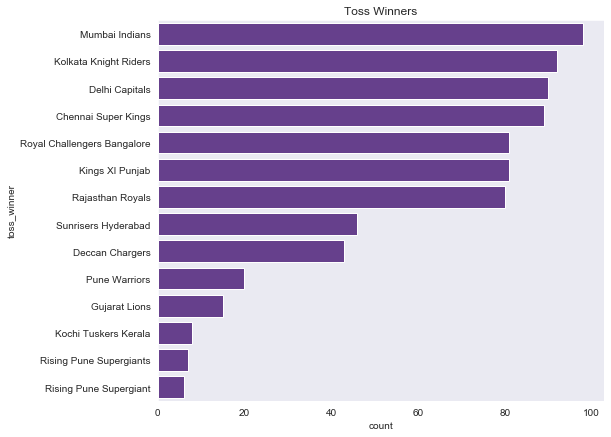

In [10]:
plt.figure(figsize=(8,7))
sns.countplot(y=df1['toss_winner'].sort_values(), order=df1['toss_winner'].value_counts().index, color='rebeccapurple')
plt.title('Toss Winners')

Mumbai Indians have won the most tosses, followed by Kolkata Knight Riders and Delhi.

Decision taken by the toss winners.

Text(0.5, 1.0, 'Decision Taken by the Toss Winners')

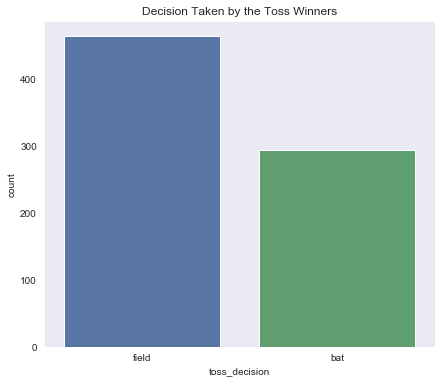

In [11]:
plt.figure(figsize=(7,6))
sns.countplot(df1['toss_decision'].sort_values(), order=df1['toss_decision'].value_counts().index)
plt.title('Decision Taken by the Toss Winners')

Fielding first seems to be a more popular choice than batting first.

Plotting how often toss winners win the match as well.

Text(0.5, 1.0, 'Toss Winners + Match Winners vs Just Match Winners')

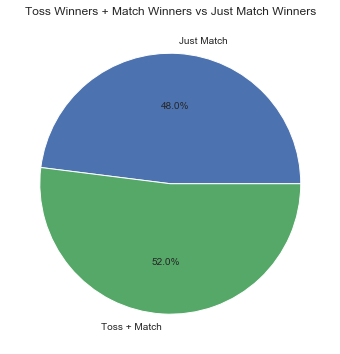

In [12]:
df1['same'] = (df1['toss_winner'] == df1['winner'])
plt.figure(figsize=(7,6))
plt.pie(df1.groupby('same').size(), labels=['Just Match', 'Toss + Match'], autopct='%1.1f%%')
plt.title('Toss Winners + Match Winners vs Just Match Winners')

The percentage of teams winning the match after winning the toss is slightly higher.

Teams winning the most matches.

Text(0.5, 1.0, 'Teams Winning the Most Matches')

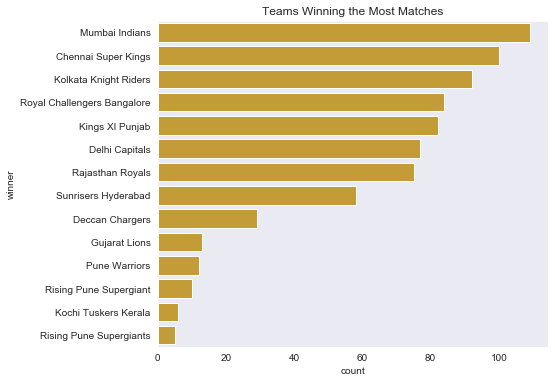

In [13]:
plt.figure(figsize=(7,6))
sns.countplot(y=df1['winner'].sort_values(), order=df1['winner'].value_counts().index, color='goldenrod')
plt.title('Teams Winning the Most Matches')

Mumbai Indians have also won the most matches, followed by Chennai Super Kings and Kolkata Knight Riders.

In [14]:
def last(df):
    return df.iloc[-1]

dff = df1.groupby('season').apply(last)
dff['winner'].value_counts().nlargest(1)

Mumbai Indians    4
Name: winner, dtype: int64

Mumbai Indians is also the team which has won the most titles, i.e., 4.

Comparision between teams that most frequently win by batting first and second.

Text(0.5, 1.0, 'Second Batting Wins')

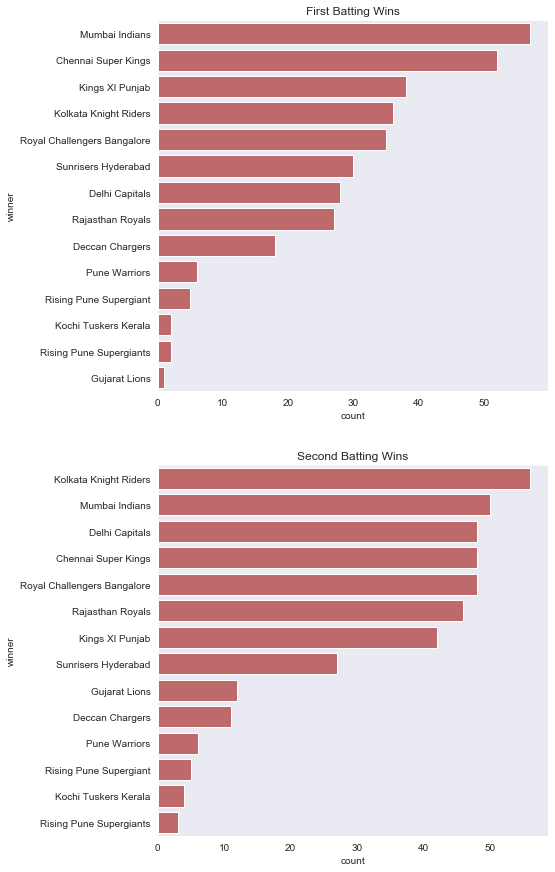

In [15]:
first_batting = df1[df1['win_by_runs'] != 0]
second_batting = df1[df1['win_by_wickets'] != 0]

fig, ax = plt.subplots(2, 1, figsize=(7, 15))
sns.countplot(y=first_batting['winner'].sort_values(), order=first_batting['winner'].value_counts().index, 
              color='indianred', ax=ax[0])
ax[0].set_title('First Batting Wins')

sns.countplot(y=second_batting['winner'].sort_values(), order=second_batting['winner'].value_counts().index, 
              color='indianred', ax=ax[1])
ax[1].set_title('Second Batting Wins')

The first position is dominated by Mumbai Indians while batting first and Kolkata Night Riders while batting second.

Comparing the first batting and second batting wins.

Text(0.5, 1.0, 'First Batting vs Second Batting Wins')

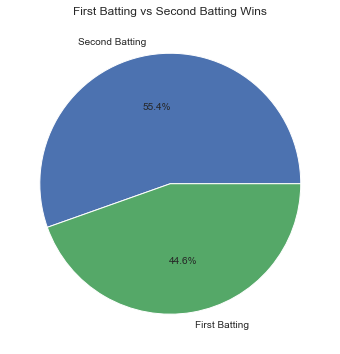

In [16]:
df1['first_wins'] =  df1['win_by_runs'] != 0
plt.figure(figsize=(7,6))
plt.pie(df1.groupby('first_wins').size(), labels=['Second Batting', 'First Batting'], autopct='%1.1f%%')
plt.title('First Batting vs Second Batting Wins')

It is observed that more wins seem to come from batting second.

Players who have most frequently won the player of match award.

Text(0.5, 1.0, 'Most Winners of Player of the Match')

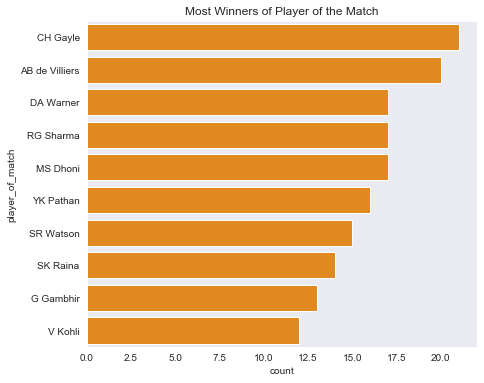

In [17]:
plt.figure(figsize=(7,6))
sns.countplot(y=df1['player_of_match'].sort_values(), order=df1['player_of_match'].value_counts().nlargest(10).index,
              color='darkorange')
plt.title('Most Winners of Player of the Match')

Chris Gayle has won the player of the match most of the times, followed by AB de Villiers and David Warner.

Defining a function for computing the most valuable players (players winning the most player of the match awards) within each team.

In [18]:
def valuable(x, y, z):
    sns.countplot(y=df1[(df1['team1'] == x) | (df1['team2'] == x)]['player_of_match'].sort_values(), 
                  order=df1[(df1['team1'] == x) | (df1['team2'] == x)]['player_of_match'].value_counts().nlargest(10).index,
                  color='steelblue', ax=ax[y][z])
    ax[y][z].set_title('Most Valuable Players of {}'.format(x))

Plotting the most valuable players within each team.

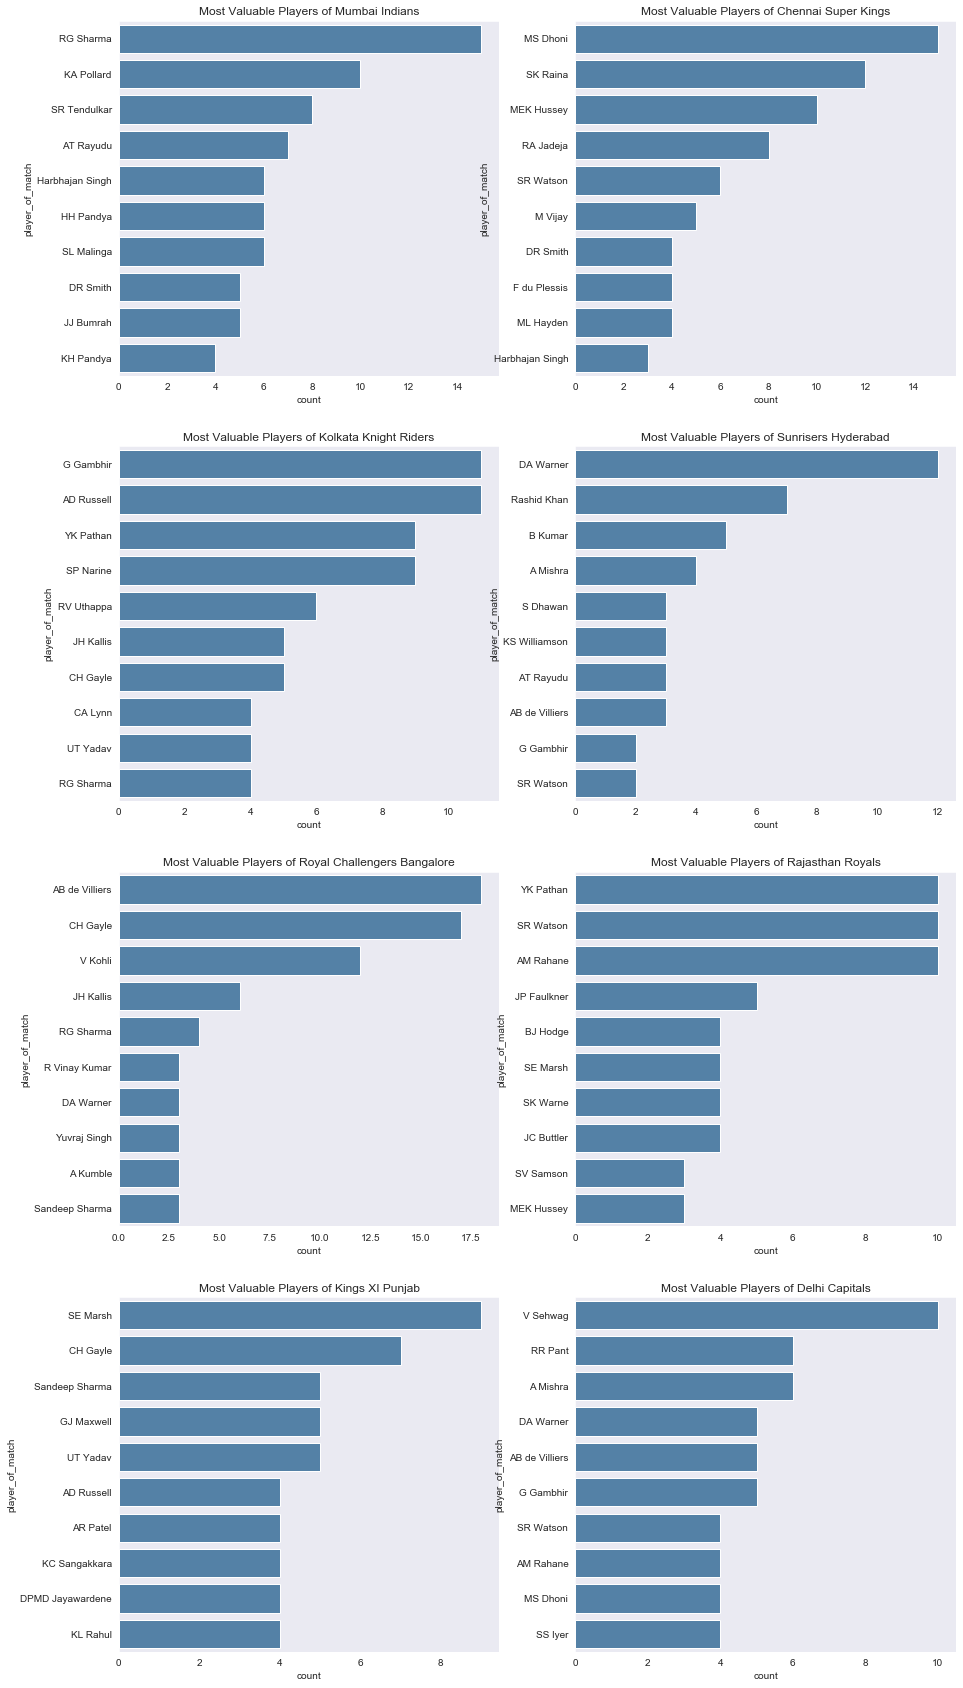

In [19]:
fig, ax = plt.subplots(4, 2, figsize=(15,30))
valuable('Mumbai Indians', 0, 0)
valuable('Chennai Super Kings', 0, 1)
valuable('Kolkata Knight Riders', 1, 0)
valuable('Sunrisers Hyderabad', 1, 1)
valuable('Royal Challengers Bangalore', 2, 0)
valuable('Rajasthan Royals', 2, 1)
valuable('Kings XI Punjab', 3, 0)
valuable('Delhi Capitals', 3, 1)

Defining a function for plotting the performance of a team over the years.

In [20]:
def performance(x, y, z):
    team = df1[df1['winner'] == x]
    sns.lineplot(data=team.groupby('season').size(), ax=ax[y][z])
    ax[y][z].set_ylim(0,15)
    ax[y][z].set_yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    ax[y][z].set_title('Performance Over the Years of {}'.format(x))

Plotting the performance of various teams over the years.

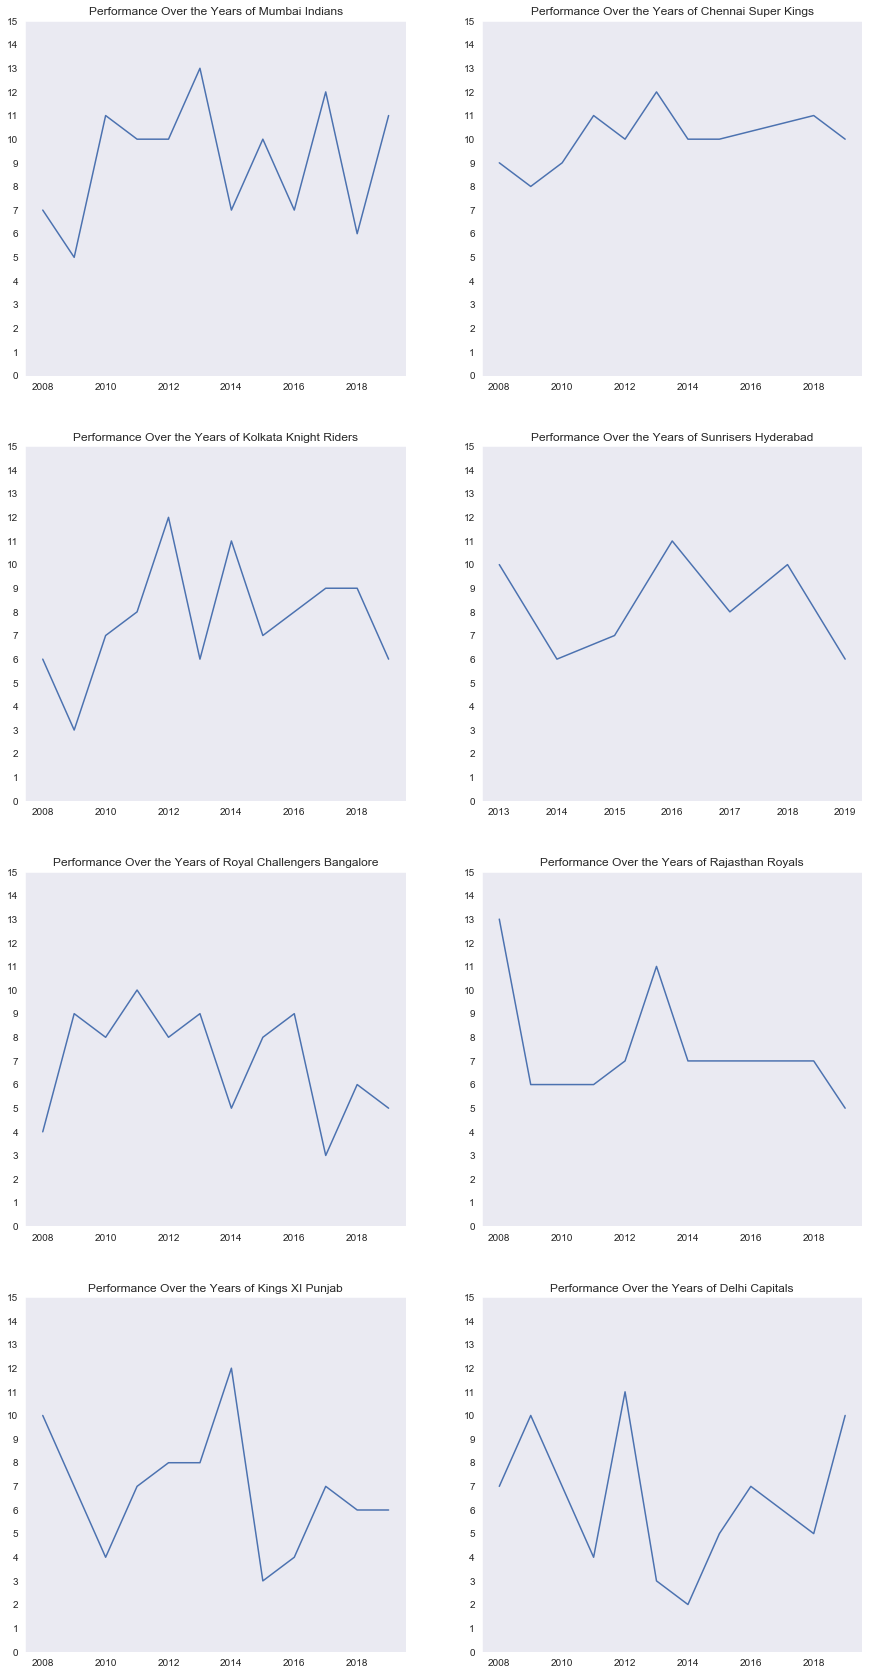

In [21]:
fig, ax = plt.subplots(4, 2, figsize=(15,30))
performance('Mumbai Indians', 0, 0)
performance('Chennai Super Kings', 0, 1)
performance('Kolkata Knight Riders', 1, 0)
performance('Sunrisers Hyderabad', 1, 1)
performance('Royal Challengers Bangalore', 2, 0)
performance('Rajasthan Royals', 2, 1)
performance('Kings XI Punjab', 3, 0)
performance('Delhi Capitals', 3, 1)

Chennai Super Kings seems to be the most consistent team over the years.

Percentage of matches where duckworth-lewis was applied.

Text(0.5, 1.0, 'Fraction of Matches with Duckworth-Lewis Applied')

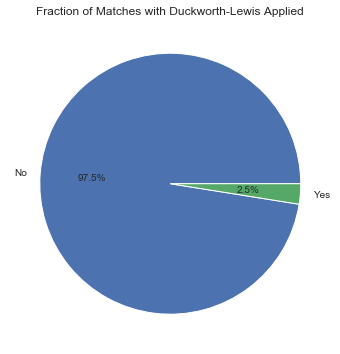

In [22]:
plt.figure(figsize=(7,6))
plt.pie(df1.groupby('dl_applied').size(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Fraction of Matches with Duckworth-Lewis Applied')

A very small fraction of matches saw the application of duckworth-lewis.

Most played venue and city.

In [23]:
df1['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

Here, we can see that due to some mistakes, the same venue has come twice. So, fixing that.

In [24]:
df1['venue'] = df1['venue'].replace('M. Chinnaswamy Stadium', 'M Chinnaswamy Stadium')
df1['venue'] = df1['venue'].replace('Rajiv Gandhi International Stadium, Uppal', 'Rajiv Gandhi Intl. Cricket Stadium')
df1['venue'] = df1['venue'].replace('Feroz Shah Kotla', 'Feroz Shah Kotla Ground')
df1['venue'] = df1['venue'].replace('MA Chidambaram Stadium, Chepauk', 'M. A. Chidambaram Stadium')
df1['venue'] = df1['venue'].replace('Punjab Cricket Association IS Bindra Stadium, Mohali', 'IS Bindra Stadium')
df1['venue'] = df1['venue'].replace('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'ACA-VDCA Stadium')
df1['venue'] = df1['venue'].replace('Subrata Roy Sahara Stadium', 'Maharashtra Cricket Association Stadium')

In [25]:
df1['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', nan, 'Rajkot', 'Kanpur', 'Bengaluru',
       'Mohali'], dtype=object)

Replacing Bengaluru with Bangalore as it is the same city.

In [26]:
df1['city'] = df1['city'].replace('Bengaluru', 'Bangalore')

Text(0.5, 1.0, 'Most Played City')

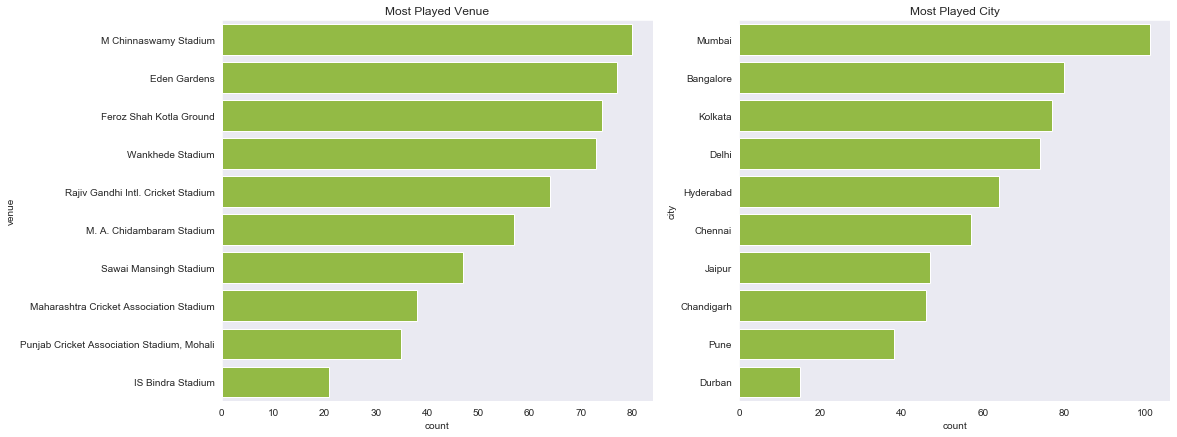

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(17,7))
sns.countplot(y=df1['venue'].sort_values(), order=df1['venue'].value_counts().nlargest(10).index, color='yellowgreen', ax=ax[0])
ax[0].set_title('Most Played Venue')
sns.countplot(y=df1['city'].sort_values(), order=df1['city'].value_counts().nlargest(10).index, color='yellowgreen', ax=ax[1])
ax[1].set_title('Most Played City')

M Chinnaswamy Stadium seems to be the most popular venue. However, Mumbai is the most popular city.

Now, reading data from the second csv file and taking a look at it.

In [28]:
df2 = pd.read_csv('deliveries.csv')

In [29]:
pd.set_option('display.max_columns', None)
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [30]:
df2.shape

(179078, 21)

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
dtype

Merging the two datasets.

In [32]:
df = pd.merge(df1, df2, left_on='id', right_on='match_id', how='outer').drop('match_id', axis=1)

Batsmen with the most number of runs.

Text(0.5, 1.0, 'Batsmen with the Most Runs')

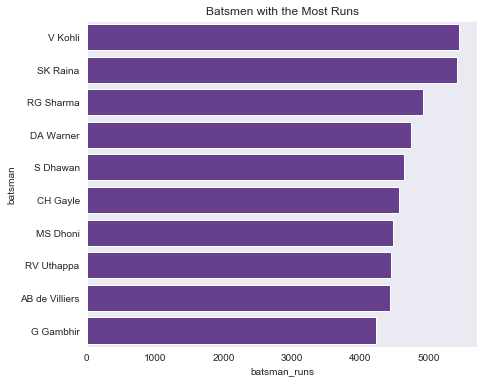

In [33]:
bat = df.groupby('batsman').agg({'batsman_runs': np.sum})
bat = bat.sort_values('batsman_runs', ascending=False)
bat = bat.iloc[:10]
plt.figure(figsize=(7,6))
sns.barplot(bat['batsman_runs'], bat.index, color='rebeccapurple')
plt.title('Batsmen with the Most Runs')

Virat Kohli has made the most runs in IPL, followed by Suresh Raina and Rohit Sharma.

Batsmen hitting the most boundaries.

Text(0.5, 1.0, 'Most Boundaries Hitting Batsmen')

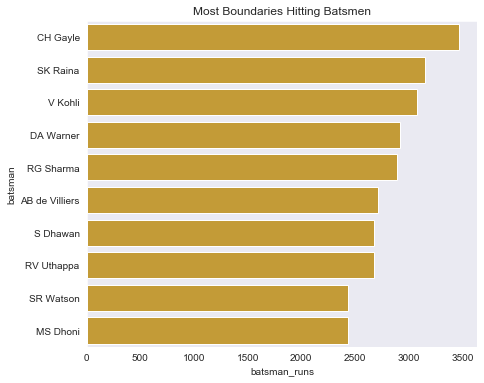

In [34]:
boundaries = df[(df['batsman_runs'] == 6) | (df['batsman_runs'] == 4)]
bo = boundaries.groupby('batsman').agg({'batsman_runs': np.sum})
bo = bo.sort_values('batsman_runs', ascending=False)
bo = bo.iloc[:10]
plt.figure(figsize=(7,6))
sns.barplot(bo['batsman_runs'], bo.index, color='goldenrod')
plt.title('Most Boundaries Hitting Batsmen')

Chris Gayle has hit the most boundaries in IPL, followed by Suresh Raina and Virat Kohli.

Batsmen hitting the most sixes and fours.

Text(0.5, 1.0, 'Most Fours Hitting Batsmen')

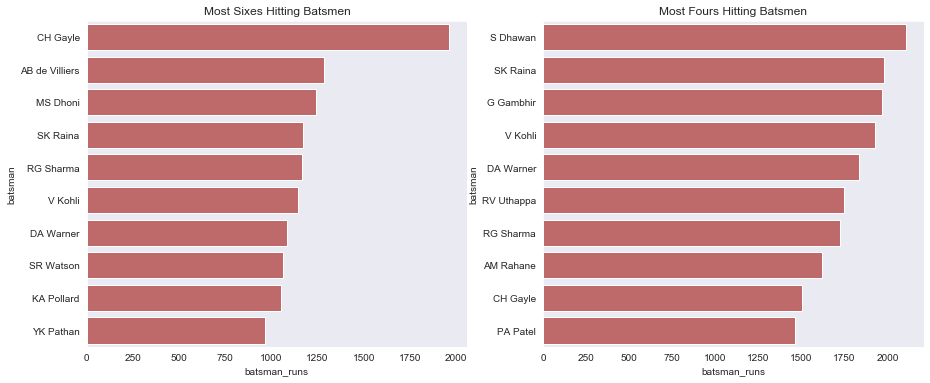

In [35]:
sixes = df[df['batsman_runs'] == 6]
six = sixes.groupby('batsman').agg({'batsman_runs': np.sum})
six = six.sort_values('batsman_runs', ascending=False)
six = six.iloc[:10]

fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.barplot(six['batsman_runs'], six.index, color='indianred', ax=ax[0])
ax[0].set_title('Most Sixes Hitting Batsmen')

fours = df[df['batsman_runs'] == 4]
four = fours.groupby('batsman').agg({'batsman_runs': np.sum})
four = four.sort_values('batsman_runs', ascending=False)
four = four.iloc[:10]

sns.barplot(four['batsman_runs'], four.index, color='indianred', ax=ax[1])
ax[1].set_title('Most Fours Hitting Batsmen')

Chris Gayle is the batsman with the most sixes in IPL, followed by AB de Villiers and MS Dhoni while Shikhar Dhawan is the batsman with the most fours in IPL, followed by Suresh Raina and Gautam Gambhir.

Highest individual scores by a batsman in an inning.

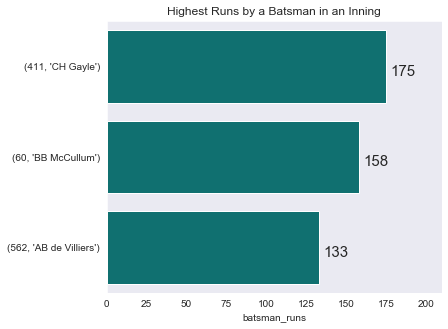

In [36]:
x = df.groupby(['id', 'batsman']).agg({'batsman_runs': np.sum})
x = x.sort_values('batsman_runs', ascending=False)
x = x.iloc[:3]
y = x['batsman_runs']
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(x['batsman_runs'], x.index, color='teal', ax=ax)
ax.set_title('Highest Runs by a Batsman in an Inning')
ax.set_xlim(0, 210)
for i, v in enumerate(y):
    ax.text(v + 3, i + .1, str(v), fontsize=15)

Chris Gayle is the batsman with the highest individual score of 175 in an inning.

Bowlers with the most wickets.

In [37]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

Text(0.5, 1.0, 'Most Wicket Taking Bowlers')

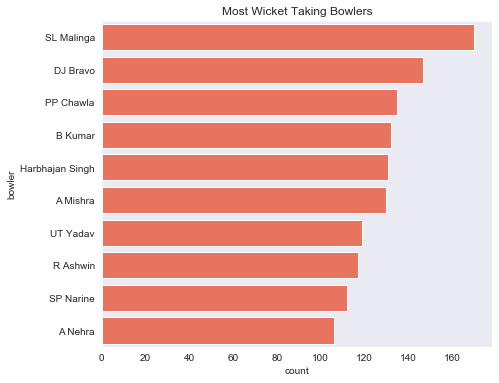

In [38]:
wickets = df[(df['dismissal_kind'] == 'caught') | (df['dismissal_kind'] == 'bowled') | 
                 (df['dismissal_kind'] == 'lbw') | (df['dismissal_kind'] == 'caught and bowled')]
plt.figure(figsize=(7,6))
sns.countplot(y=wickets['bowler'].sort_values(), order=wickets['bowler'].value_counts().nlargest(10).index, color='tomato')
plt.title('Most Wicket Taking Bowlers')

The highest number of wickets taken belong to SL Malinga, followed by DJ Bravo and PP Chawla.

Highest wickets taken by a bowler in an inning.

In [39]:
wickets.groupby(['id', 'bowler']).size().nlargest(5)

id     bowler       
83     Sohail Tanvir    6
11310  A Joseph         6
13     AJ Tye           5
19     B Kumar          5
43     JD Unadkat       5
dtype: int64

Lets expand nlargest because there may be more bowlers with 5 wickets.

In [40]:
wickets.groupby(['id', 'bowler']).size().nlargest(20)

id     bowler         
83     Sohail Tanvir      6
11310  A Joseph           6
13     AJ Tye             5
19     B Kumar            5
43     JD Unadkat         5
91     L Balaji           5
238    SL Malinga         5
257    Harbhajan Singh    5
265    I Sharma           5
287    MM Patel           5
321    AD Mascarenhas     5
325    SP Narine          5
416    JP Faulkner        5
438    JD Unadkat         5
449    JP Faulkner        5
616    A Zampa            5
7918   AS Rajpoot         5
11     UT Yadav           4
12     S Badree           4
21     CH Morris          4
dtype: int64

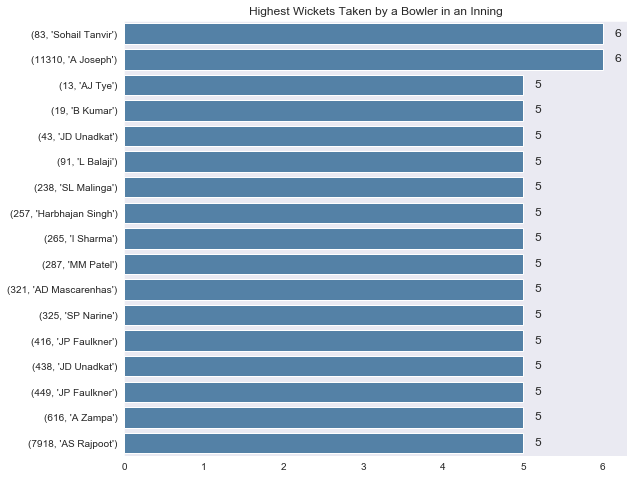

In [41]:
x = wickets.groupby(['id', 'bowler']).size().nlargest(17)
y = [6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5]
fig, ax = plt.subplots(figsize=(9,8))
sns.barplot(x, x.index, color='steelblue', ax=ax)
ax.set_title('Highest Wickets Taken by a Bowler in an Inning')
for i, v in enumerate(y):
    ax.text(v + .15, i + .1, str(v), fontsize=12)

Sohail Tanvir and A Joseph are the only bowlers to have taken 6 wickets in an inning.

Bowlers giving the most wide runs and the most no-ball runs.

Text(0.5, 1.0, 'Bowlers Giving the Most No Ball Runs')

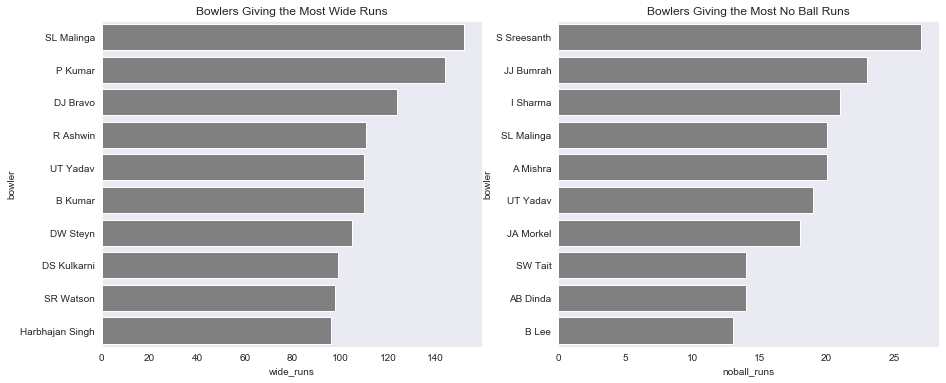

In [42]:
wide = df.groupby('bowler').agg({'wide_runs': np.sum})
wide = wide.sort_values('wide_runs', ascending=False)
wide = wide.iloc[:10]

fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.barplot(wide['wide_runs'], wide.index, color='gray', ax=ax[0])
ax[0].set_title('Bowlers Giving the Most Wide Runs')

noball = df.groupby('bowler').agg({'noball_runs': np.sum})
noball = noball.sort_values('noball_runs', ascending=False)
noball = noball.iloc[:10]
sns.barplot(noball['noball_runs'], noball.index, color='gray', ax=ax[1])
ax[1].set_title('Bowlers Giving the Most No Ball Runs')

SL Malinga seems to give the most runs on wide balls, followed by P Kumar and DJ Bravo while S Sreesanth seems to give the most runs on no balls, followed by JJ Bumrah and I Sharma.

Players with the most catches, including wicket-keepers.

Text(0.5, 1.0, 'Players with the Most Catches')

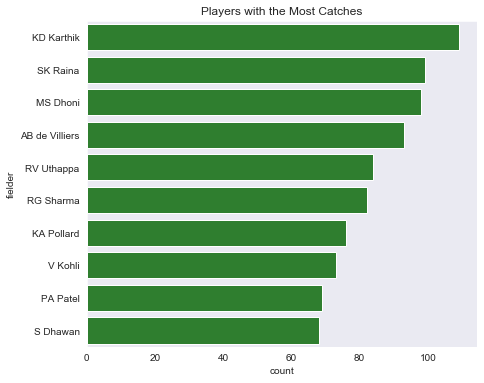

In [43]:
fielders = df[(df['dismissal_kind'] == 'caught') | (df['dismissal_kind'] == 'caught and bowled')]
plt.figure(figsize=(7,6))
sns.countplot(y=fielders['fielder'].sort_values(), order=fielders['fielder'].value_counts().nlargest(10).index, 
              color='forestgreen')
plt.title('Players with the Most Catches')

KD Karthik has the highest number of catches behind the stumps as he is a wicket-keeper. Suresh Raina has the highest number of catches as a normal fielder.

Highest score by a team in an inning.

In [44]:
x = df.groupby(['id', 'inning']).agg({'total_runs': np.sum})
x = x.sort_values('total_runs', ascending=False)
x = x.iloc[:3]
x

,,total_runs
id,inning,
411,1,263
7937,1,250
620,1,248


Since all highest scores belong to the first inning, we can group by team 1 to see the name of the team.

In [45]:
x = df.groupby(['id', 'inning', 'team1']).agg({'total_runs': np.sum})
x = x.sort_values('total_runs', ascending=False)
x = x.iloc[:3]
y = x['total_runs']
x

,,,total_runs
id,inning,team1,
411,1,Royal Challengers Bangalore,263
7937,1,Kolkata Knight Riders,250
620,1,Royal Challengers Bangalore,248


Here, RCB being first is correct but KKR being second is not correct. So, I explored the official IPL website and compared the data for this particular match of KKR and found that every time a wide run was given, it was recorded as 2 in this dataset for this game. So, fixing that.

In [46]:
df.at[164295,'total_runs'] = 1
df.at[164301,'total_runs'] = 1
df.at[164356,'total_runs'] = 1
df.at[164358,'total_runs'] = 1
df.at[164364,'total_runs'] = 1

In [47]:
x = df.groupby(['id', 'inning', 'team1']).agg({'total_runs': np.sum})
x = x.sort_values('total_runs', ascending=False)
x = x.iloc[:3]
y = x['total_runs']
x

,,,total_runs
id,inning,team1,
411,1,Royal Challengers Bangalore,263
620,1,Royal Challengers Bangalore,248
206,1,Chennai Super Kings,246


Now, the results are correct.

Lowest scores by a team in an inning.

In [48]:
dff = df[(df['result'] == 'normal') | (df['result'] == 'tie')]
dfff = dff[(dff['inning'] == 1) | (dff['inning'] == 2)]
d = dfff[dfff['dl_applied'] == 0]
x1 = d.groupby(['id', 'inning',]).agg({'total_runs': np.sum})
x1 = x1.sort_values('total_runs')
x1 = x1.iloc[:3]
x1

,,total_runs
id,inning,
27,2,49
119,2,58
44,2,66


Since all lowest scores belong to the first inning, we can group by team 2 to see the name of the team.

In [49]:
x1 = d.groupby(['id', 'inning', 'team2']).agg({'total_runs': np.sum})
x1 = x1.sort_values('total_runs')
x1 = x1.iloc[:3]
y1 = x1['total_runs']
x1

,,,total_runs
id,inning,team2,
27,2,Royal Challengers Bangalore,49
119,2,Rajasthan Royals,58
44,2,Delhi Capitals,66


Comparision of the highest and lowest scores by a team in an inning.

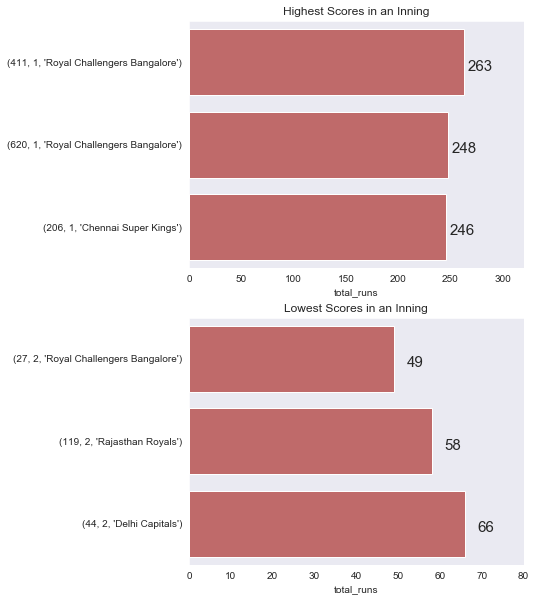

In [50]:
fig, ax = plt.subplots(2, 1, figsize=(6,10))

sns.barplot(x['total_runs'], x.index, color='indianred', ax=ax[0])
ax[0].set_title('Highest Scores in an Inning')
ax[0].set_xlim(0, 320)
for i, v in enumerate(y):
    ax[0].text(v + 3, i + .1, str(v), fontsize=15)

sns.barplot(x1['total_runs'], x1.index, color='indianred', ax=ax[1])
ax[1].set_title('Lowest Scores in an Inning')
ax[1].set_xlim(0, 80)
for i, v in enumerate(y1):
    ax[1].text(v + 3, i + .1, str(v), fontsize=15)

Royal Challengers Bangalore has the highest score of 263 in an inning. It also has the lowest score of 49 in an inning.

Finally, it looks that the dataset seems to have inconsistent or incorrect values as well. Luckily, I found some but I did not verify every thing projected here because it was not possible for me. Hence, please feel free to point out errors in this analysis and notify them to me.